In [33]:
# %pip install tensorflow 
# %pip install numpy
# %pip install pandas
# %pip install matplotlib 

In [34]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [35]:
data_train_path = 'Fruits_Vegetables/train'
data_validate_path = 'Fruits_Vegetables/validation'
data_test_path = 'Fruits_Vegetables/test'

In [36]:
IMG_WIDTH = 180
IMG_HEIGHT = 180
BATCH_SIZE = 32

In [37]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (IMG_WIDTH, IMG_HEIGHT),
    batch_size = BATCH_SIZE,
    validation_split=False
)

data_validate = tf.keras.utils.image_dataset_from_directory(
    data_validate_path,
    shuffle=True,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    validation_split=False
)

data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    validation_split=False
)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [38]:
data_categories = data_train.class_names

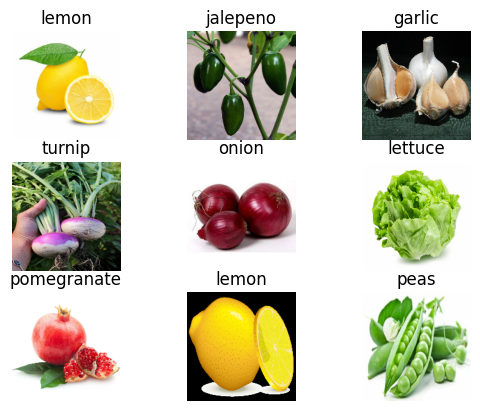

In [39]:
# Displaying a images from the training dataset
plt.Figure(figsize=(10, 10))
for image, label in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_categories[label[i]])
        plt.axis("off")

In [40]:
from tensorflow.keras import Sequential

In [41]:
model = Sequential([
    layers.Rescaling(1/255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_categories), activation='softmax')
])

In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'] 
)

EPOCHS = 25
history = model.fit(
    data_train,
    validation_data=data_validate,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.0408 - loss: 3.6451 - val_accuracy: 0.1823 - val_loss: 2.9194
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.1666 - loss: 2.9153 - val_accuracy: 0.3419 - val_loss: 2.2970
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - accuracy: 0.3092 - loss: 2.3916 - val_accuracy: 0.4872 - val_loss: 1.6889
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.4204 - loss: 1.9265 - val_accuracy: 0.6268 - val_loss: 1.2058
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.5397 - loss: 1.5142 - val_accuracy: 0.7835 - val_loss: 0.8151
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.6748 - loss: 1.0459 - val_accuracy: 0.8661 - val_loss: 0.5464
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.7990 - loss: 0.6843 - val_accuracy: 0.8889 - val_loss: 0.4674
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.8420 - loss: 0.5153 - val_accu

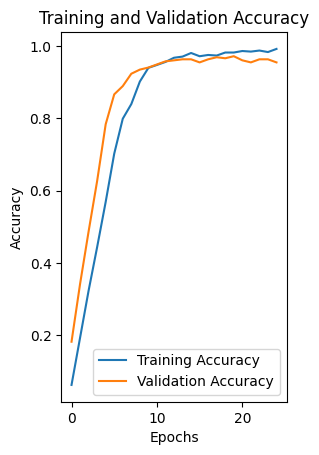

In [43]:
epoch_range = range(EPOCHS)
plt.Figure(figsize=(8,8))
plt.subplot(1, 2, 2)
plt.plot(epoch_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [44]:
image_path = 'image.png'
image = tf.keras.utils.load_img(
    image_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT)
)
image_arr = tf.keras.utils.img_to_array(image)
image_bat = tf.expand_dims(image_arr, axis=0)

predictions = model.predict(image_bat)
score = tf.nn.softmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [45]:
print('veg/fruit in image is {} with accuracy of {:0.2f}: '.format(data_categories[np.argmax(score)], 100 * np.max(score)))

veg/fruit in image is orange with accuracy of 5.85: 
